Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [19]:
from sklearn.metrics import matthews_corrcoef # matthews
from scipy.stats.contingency import association # cramer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_products = pd.read_csv('foodmart.products.tsv', sep='\t')
df_sales = pd.read_csv('foodmart.sales.tsv', sep='\t')

df_products.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [21]:
df_sales.head()

,product_id,store_id,date,sales
0,4,6,1997-01-01,4
1,25,6,1997-01-01,3
2,48,6,1997-01-01,3
3,76,6,1997-01-01,4
4,119,6,1997-01-01,3


In [22]:
df = pd.merge(df_sales, df_products, on='product_id', how='inner')
df.head()

,product_id,store_id,date,sales,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,4,6,1997-01-01,4,19,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93
1,25,6,1997-01-01,3,58,Blue Label,Blue Label Chicken Noodle Soup,62032982707,1.55,9.48,8.47,True,True,21,10,4.98,4.71,22.40
2,48,6,1997-01-01,3,11,Club,Club String Cheese,76026721596,1.88,6.31,3.30,True,True,17,7,5.22,18.70,11.20
3,76,6,1997-01-01,4,8,Red Spade,Red Spade Sliced Chicken,62054644227,1.69,18.10,17.10,False,True,4,7,14.60,13.50,3.42
4,119,6,1997-01-01,3,79,Faux Products,Faux Products Extra Moisture Shampoo,35068821310,2.28,20.10,19.10,False,False,7,12,7.86,8.33,14.70


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83391 entries, 0 to 83390
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          83391 non-null  int64  
 1   store_id            83391 non-null  int64  
 2   date                83391 non-null  object 
 3   sales               83391 non-null  int64  
 4   product_class_id    83391 non-null  int64  
 5   brand_name          83391 non-null  object 
 6   product_name        83391 non-null  object 
 7   SKU                 83391 non-null  int64  
 8   SRP                 83391 non-null  float64
 9   gross_weight        83391 non-null  float64
 10  net_weight          83391 non-null  float64
 11  recyclable_package  83391 non-null  bool   
 12  low_fat             83391 non-null  bool   
 13  units_per_case      83391 non-null  int64  
 14  cases_per_pallet    83391 non-null  int64  
 15  shelf_width         83391 non-null  float64
 16  shel

In [24]:
sparse_sales = pd.pivot_table(df, values='sales', index='date', columns='product_name', aggfunc='sum', fill_value=0)

In [25]:
corr_spearman = sparse_sales.corr(method='spearman')
corr_pearson = sparse_sales.corr(method='pearson')

np.fill_diagonal(corr_spearman.values, np.nan)
np.fill_diagonal(corr_pearson.values, np.nan)

In [26]:
target = 'American Chicken Hot Dogs'

most_correlated_spearman = corr_spearman[target].idxmax()
most_correlated_spearman_value = corr_spearman[target][most_correlated_spearman]
print("Spearman:", most_correlated_spearman, most_correlated_spearman_value)

most_correlated_pearson = corr_pearson['American Chicken Hot Dogs'].idxmax()
most_correlated_pearson_value = corr_pearson[target][most_correlated_pearson]
print("Pearson:", most_correlated_pearson, most_correlated_pearson_value)

if most_correlated_spearman_value > most_correlated_pearson_value:
    most_corr_product = most_correlated_spearman
else:
    most_corr_product = most_correlated_pearson

Spearman: Carlson Sour Cream 0.2580978387271545
Pearson: Better Canned Tuna in Oil 0.2976601576663104


### Better Canned Tuna наиболее коррелирующий товар по значению.

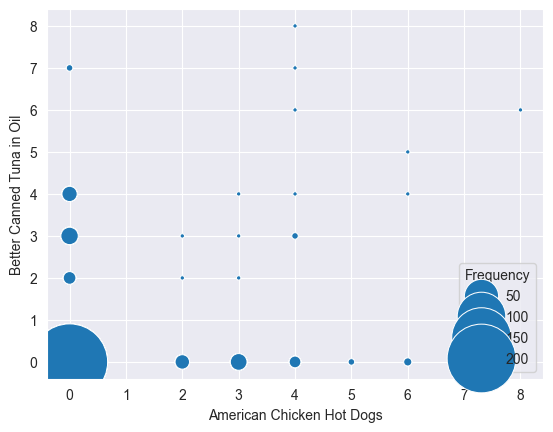

In [27]:
sparse_sales['Frequency'] = sparse_sales.groupby(['American Chicken Hot Dogs', most_corr_product]).transform('size')
scatter = sns.scatterplot(x=sparse_sales[target], y=sparse_sales[most_corr_product], size=sparse_sales['Frequency'], sizes=(10, 3000))

<Axes: xlabel='date', ylabel='American Chicken Hot Dogs'>

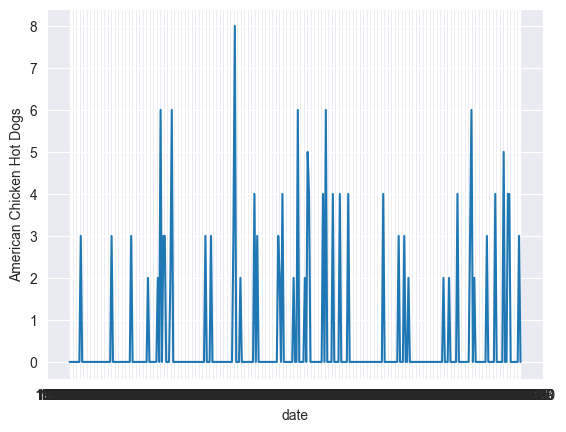

In [28]:
sns.lineplot(data=sparse_sales[target])

<Axes: xlabel='date', ylabel='Better Canned Tuna in Oil'>

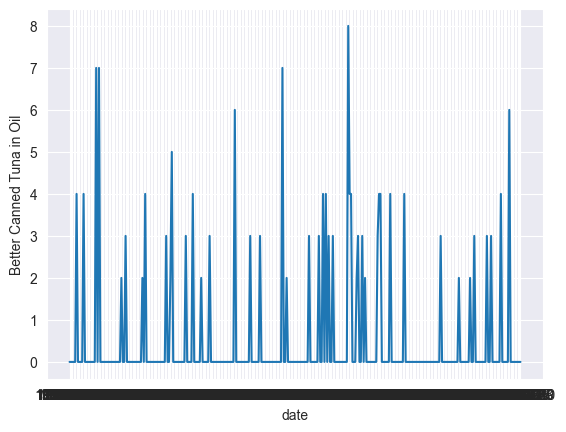

In [29]:
sns.lineplot(data=sparse_sales[most_corr_product])

In [30]:
matthews_corrcoef(df['recyclable_package'], df['low_fat'])


-0.022364293265823097

<Axes: xlabel='recyclable_package', ylabel='count'>

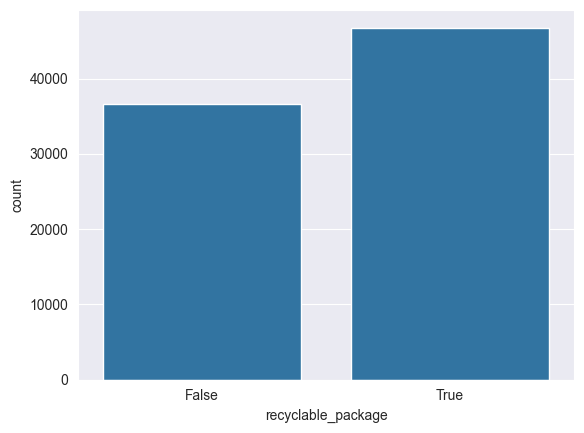

In [31]:
sns.countplot(data=df, x='recyclable_package')

<Axes: xlabel='low_fat', ylabel='count'>

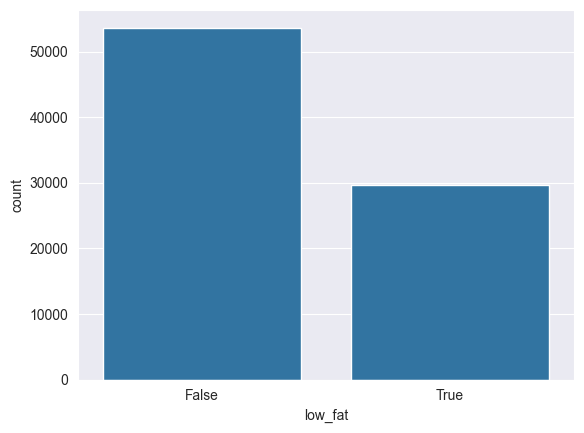

In [32]:
sns.countplot(data=df, x='low_fat')

In [33]:
confusion_matrix = pd.crosstab(df['store_id'], df['brand_name'])

cramer = association(confusion_matrix, method='cramer')
print(cramer)

0.0343024046787291


### Отсутствует корреляция между именем бренда и id магазина 

<Axes: xlabel='brand_name', ylabel='store_id'>

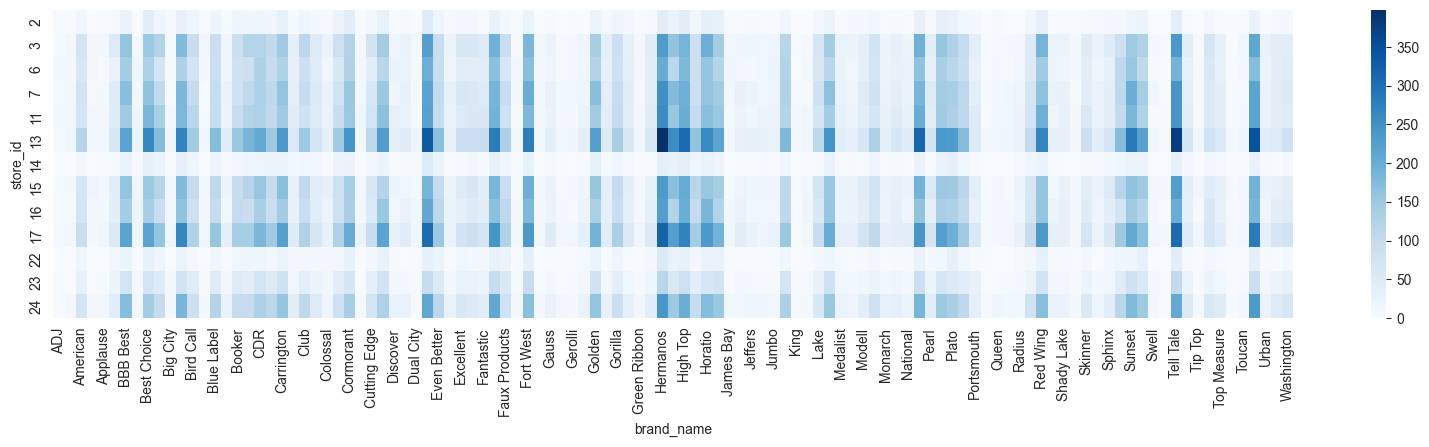

In [34]:
plt.figure(figsize=(20, 4))
sns.heatmap(data=confusion_matrix, cmap="Blues")